   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


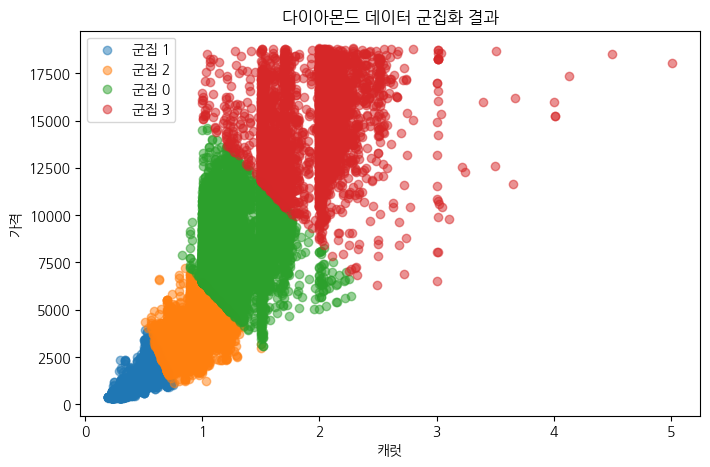

In [5]:
# ------------------ [필요한 라이브러리] ------------------
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 한글 + 이모지 깨짐 방지
import platform
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ------------------ [1. 데이터 로드] ------------------
dia = sns.load_dataset('diamonds')
print(dia.head())

# ------------------ [2. 군집에 사용할 특성 선택] ------------------
X = dia[['carat', 'price']]  # 캐럿과 가격만 사용

# ------------------ [3. 스케일링] ------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------ [4. KMeans 모델 학습] ------------------
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# ------------------ [5. 결과 저장] ------------------
dia['cluster'] = clusters

# ------------------ [6. 시각화] ------------------
plt.figure(figsize=(8, 5))
for c in dia['cluster'].unique():
    cluster_data = dia[dia['cluster'] == c]
    plt.scatter(cluster_data['carat'], cluster_data['price'], label=f'군집 {c}', alpha=0.5)

plt.xlabel("캐럿")
plt.ylabel("가격")
plt.title("다이아몬드 데이터 군집화 결과")
plt.legend()
plt.show()
